#Dataset
Belongs to the Banking, financial services and insurance (BFSI) sector

**X_train**  
Unique_ID: Represent the Unique Identifier  
C1 to C8: Represents **Categorical** Columns, which are already encoded into numeric representation  
N1 to N35: Represent **Numerical** Columns


**y_train**  
Unique_ID: Represent the Unique Identifier  
Dependent_Variable: Represent the outcome or dependent variable


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.metrics
# import roc_curve, auc, roc_auc_score
import lightgbm as lgbm

In [ ]:
x_train_df = pd.read_csv('X_train.csv')
y_train_df = pd.read_csv('y_train.csv')
x_test_df = pd.read_csv('X_test.csv')

# Exploratory Data Analysis

In [ ]:
x_train_df.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N25,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_5926,1,0,11,31,0,False,0,True,23.75,NaN,2.5,NaN,NaN,2.595,10.0,0,0,2.0,14.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.816,1750.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,113.39,12.0
1,Candidate_48134,1,4,2,66,2,False,1,True,11.05,22.0,3.7,16.0,12.0,3.795,19.0,4,72,0.0,5.0,9.0,0.0,0.0,0.0,0.0,1944.0,0.06,25856.0,17.0,0.88,1.0,40.000,10833.333330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,262.10,17.0
2,Candidate_51717,1,0,19,2,0,False,0,True,29.00,NaN,2.4,NaN,NaN,2.495,17.0,2,15,7.0,3.0,19.0,NaN,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000,6250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,50.29,18.0
3,Candidate_26401,1,1,16,47,1,False,4,True,17.99,1.0,3.5,4.0,4.0,3.595,6.0,5,190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8244.0,0.89,1006.0,6.0,1.00,0.0,26.000,2413.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,126.52,27.0
4,Candidate_34872,1,1,13,1,1,True,6,True,27.50,206.0,3.8,11.0,11.0,3.895,31.0,10,1504,0.0,1.0,4.0,0.0,0.0,0.0,0.0,57532.0,0.97,3398.0,31.0,0.96,0.0,44.000,7666.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,205.47,21.0


In [ ]:
x_test_df.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N25,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_1602,1,0,0,23,0,True,0,True,18.00,NaN,3.2,NaN,NaN,3.295,27.0,2,0,3.0,3.0,12.0,NaN,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,3333.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,90.38,23.0
1,Candidate_29650,1,0,2,4,2,True,2,True,16.75,107.0,3.7,7.0,4.0,3.795,19.0,4,522,0.0,1.0,6.0,0.0,0.0,0.0,0.0,59435.0,0.83,12165.0,19.0,0.94,2.0,36.0,5779.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,532.93,16.0
2,Candidate_31061,1,2,3,38,1,False,4,True,29.99,45.0,3.2,5.0,4.0,3.295,49.0,3,79,0.0,5.0,8.0,0.0,12.0,1.0,0.0,1996.0,0.79,504.0,34.0,0.70,2.0,48.0,3083.333333,1.0,6.0,6.0,0.0,0.0,5000.0,4334.59,-82.0,80.0,169.78,22.0
3,Candidate_5768,1,1,28,20,2,False,2,True,17.70,20.0,3.3,7.0,6.0,3.395,10.0,5,299,1.0,1.0,1.0,0.0,0.0,0.0,0.0,9281.0,0.84,1428.0,9.0,0.77,0.0,36.0,5117.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,270.02,13.0
4,Candidate_27059,1,1,15,1,3,False,5,False,28.00,2.0,3.0,20.0,18.0,3.095,34.0,12,396,0.0,0.0,2.0,0.0,0.0,0.0,0.0,13902.0,0.64,6324.0,25.0,0.92,2.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,103.41,14.0


In [ ]:
c6 = x_train_df['C6'].astype(int)
c8 = x_train_df['C8'].astype(int)

x_train_df['C6'] = c6
x_train_df['C8'] = c8

c62 = x_test_df['C6'].astype(int)
c82 = x_test_df['C8'].astype(int)

x_test_df['C6'] = c62
x_test_df['C8'] = c82

In [ ]:
x_train_df.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N25,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_5926,1,0,11,31,0,0,0,1,23.75,NaN,2.5,NaN,NaN,2.595,10.0,0,0,2.0,14.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.816,1750.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,113.39,12.0
1,Candidate_48134,1,4,2,66,2,0,1,1,11.05,22.0,3.7,16.0,12.0,3.795,19.0,4,72,0.0,5.0,9.0,0.0,0.0,0.0,0.0,1944.0,0.06,25856.0,17.0,0.88,1.0,40.000,10833.333330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,262.10,17.0
2,Candidate_51717,1,0,19,2,0,0,0,1,29.00,NaN,2.4,NaN,NaN,2.495,17.0,2,15,7.0,3.0,19.0,NaN,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000,6250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,50.29,18.0
3,Candidate_26401,1,1,16,47,1,0,4,1,17.99,1.0,3.5,4.0,4.0,3.595,6.0,5,190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8244.0,0.89,1006.0,6.0,1.00,0.0,26.000,2413.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,126.52,27.0
4,Candidate_34872,1,1,13,1,1,1,6,1,27.50,206.0,3.8,11.0,11.0,3.895,31.0,10,1504,0.0,1.0,4.0,0.0,0.0,0.0,0.0,57532.0,0.97,3398.0,31.0,0.96,0.0,44.000,7666.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,205.47,21.0


In [ ]:
x_test_df.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N25,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_1602,1,0,0,23,0,1,0,1,18.00,NaN,3.2,NaN,NaN,3.295,27.0,2,0,3.0,3.0,12.0,NaN,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,3333.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,90.38,23.0
1,Candidate_29650,1,0,2,4,2,1,2,1,16.75,107.0,3.7,7.0,4.0,3.795,19.0,4,522,0.0,1.0,6.0,0.0,0.0,0.0,0.0,59435.0,0.83,12165.0,19.0,0.94,2.0,36.0,5779.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,532.93,16.0
2,Candidate_31061,1,2,3,38,1,0,4,1,29.99,45.0,3.2,5.0,4.0,3.295,49.0,3,79,0.0,5.0,8.0,0.0,12.0,1.0,0.0,1996.0,0.79,504.0,34.0,0.70,2.0,48.0,3083.333333,1.0,6.0,6.0,0.0,0.0,5000.0,4334.59,-82.0,80.0,169.78,22.0
3,Candidate_5768,1,1,28,20,2,0,2,1,17.70,20.0,3.3,7.0,6.0,3.395,10.0,5,299,1.0,1.0,1.0,0.0,0.0,0.0,0.0,9281.0,0.84,1428.0,9.0,0.77,0.0,36.0,5117.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,270.02,13.0
4,Candidate_27059,1,1,15,1,3,0,5,0,28.00,2.0,3.0,20.0,18.0,3.095,34.0,12,396,0.0,0.0,2.0,0.0,0.0,0.0,0.0,13902.0,0.64,6324.0,25.0,0.92,2.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,103.41,14.0


In [ ]:
x_train_df.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N25,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
count,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.00000,28438.000000,32685.000000,28444.000000,28444.000000,32685.000000,32623.000000,33050.000000,33050.000000,32623.000000,32623.000000,32334.000000,28436.000000,32442.000000,32623.000000,28444.000000,2.844400e+04,28444.000000,28479.000000,28479.000000,28479.000000,28479.000000,30564.000000,33050.000000,6271.000000,6271.000000,6271.000000,6271.000000,6271.000000,6271.000000,6271.000000,6220.000000,33050.000000,33050.000000,32623.000000
mean,1.119818,2.403873,12.856097,14.437398,1.719395,0.467958,3.124932,0.923328,19.97653,81.342710,3.359361,9.574075,8.350127,3.454361,25.229930,6.082723,325.585870,0.903381,2.044049,7.108678,1016.018568,4.537760,0.330135,0.023203,1.582073e+04,0.528907,11037.365322,21.764142,0.857199,0.906422,58.433363,5050.306727,1.338224,20.084197,19.512199,0.526391,0.045288,7192.813526,2379.621620,0.744373,125.629394,224.313536,19.587254
std,0.399382,3.399024,12.013457,15.527474,1.320860,0.498980,2.158905,0.266074,8.11087,85.397795,0.411040,5.584756,4.999040,0.411040,14.274854,4.535870,452.149358,2.635207,3.172081,8.304500,6739.984010,10.610457,0.799125,0.175363,3.405137e+04,0.350046,22052.222523,12.438568,0.173017,1.227818,150.660621,6237.726330,0.680982,16.045120,15.637882,2.144069,0.443838,6460.139952,3379.065104,50.764684,104.391919,186.513844,7.352667
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.095000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,-194.000000,20.000000,0.000000,2.000000
25%,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,13.45000,21.000000,3.200000,6.000000,5.000000,3.295000,15.000000,3.000000,60.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.647000e+03,0.210000,523.000000,13.000000,0.770000,0.000000,26.000000,2833.333333,1.000000,9.000000,9.000000,0.000000,0.000000,3000.000000,0.000000,-31.000000,54.000000,98.740000,14.000000
50%,1.000000,1.000000,10.000000,10.000000,2.000000,0.000000,4.000000,1.000000,19.27500,53.000000,3.400000,9.000000,8.000000,3.495000,23.000000,5.000000,183.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,6.073000e+03,0.560000,3352.000000,20.000000,0.920000,1.000000,40.000000,4166.666667,1.000000,15.000000,14.000000,0.000000,0.000000,5000.000000,1108.440000,0.000000,90.000000,172.600000,19.000000
75%,1.000000,3.000000,20.000000,26.000000,2.000000,1.000000,4.000000,1.000000,26.90000,112.000000,3.600000,13.000000,11.000000,3.695000,33.000000,8.000000,420.000000,1.000000,3.000000,9.000000,0.000000,4.000000,0.000000,0.000000,1.627725e+04,0.840000,12285.000000,29.000000,1.000000,1.000000,60.000000,6250.000000,1.500000,28.000000,27.000000,0.000000,0.000000,9500.000000,3408.750000,32.000000,160.000000,300.947500,24.000000
max,3.000000,20.000000,51.000000,67.000000,7.000000,1.000000,7.000000,1.000000,48.00000,755.000000,4.400000,59.000000,51.000000,4.495000,129.000000,51.000000,14985.000000,83.000000,105.000000,379.000000,444745.000000,99.000000,30.000000,7.000000,1.435667e+06,5.830000,646285.000000,114.000000,1.000000,20.000000,2002.000000,618547.833300,7.000000,120.000000,111.000000,42.000000,11.000000,60001.000000,22586.670000,257.000000,700.000000,2153.380000,64.000000


In [ ]:
# x_train dimensions

print(x_train_df.shape)
num_instances, num_features = x_train_df.shape

(33050, 44)


In [ ]:
# Dropping duplicate instances, if any

x_train_df = x_train_df.drop_duplicates()
x_train_df.shape

(33050, 44)

In [ ]:
y_train_df.head()

,Unique_ID,Dependent_Variable
0,Candidate_5926,1
1,Candidate_48134,0
2,Candidate_51717,1
3,Candidate_26401,0
4,Candidate_34872,0


### Checking for class imbalance

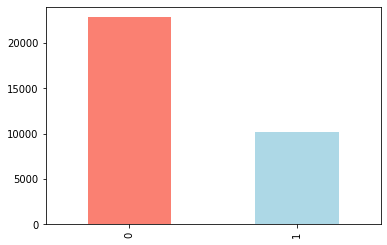

In [ ]:
y_train_df['Dependent_Variable'].value_counts().plot(kind='bar', color= ["salmon", "lightblue"])

Class '1' is approximately one third of class '0' in proportion

### Checking for Null values

In [ ]:
x_train_df.isna().sum()

Unique_ID        0
C1               0
C2               0
C3               0
C4               0
C5               0
C6               0
C7               0
C8               0
N1               0
N2            4612
N3             365
N4            4606
N5            4606
N6             365
N7             427
N8               0
N9               0
N10            427
N10.1          427
N11            716
N12           4614
N14            608
N15            427
N16           4606
N17           4606
N18           4606
N19           4571
N20           4571
N21           4571
N22           4571
N23           2486
N24              0
N25          26779
N26          26779
N27          26779
N28          26779
N29          26779
N30          26779
N31          26779
N32          26830
N33              0
N34              0
N35            427
dtype: int64

In [ ]:
missing_values = pd.DataFrame({c:(x_train_df[c].isna().sum()/len(x_train_df))*100 for c in x_train_df.columns},index=["% missing values"])
missing_values

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N25,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
% missing values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.954614,1.104387,13.93646,13.93646,1.104387,1.291982,0.0,0.0,1.291982,1.291982,2.166415,13.960666,1.839637,1.291982,13.93646,13.93646,13.93646,13.83056,13.83056,13.83056,13.83056,7.521936,0.0,81.025719,81.025719,81.025719,81.025719,81.025719,81.025719,81.025719,81.18003,0.0,0.0,1.291982


### Dimesionality/Feature Reduction 

1. Dropping the Duplicate features (like N3 and N6)
2. Dropping Features with >30% missing values (NA)

In [ ]:
# Dropping features with >30% missing values

discard_features=[]

for i in missing_values.columns:
  if missing_values[i][0] >= 30:
    discard_features.append(i)

print(discard_features)

x_train_df = x_train_df.drop(labels= discard_features, axis =1)
x_test_df = x_test_df.drop(labels= discard_features, axis=1)

num_instances, num_features = x_train_df.shape
print(x_train_df.shape)
x_train_df.head()

['N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31', 'N32']
(33050, 36)


,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
0,Candidate_5926,1,0,11,31,0,0,0,1,23.75,NaN,2.5,NaN,NaN,2.595,10.0,0,0,2.0,14.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.816,1750.000000,58.0,113.39,12.0
1,Candidate_48134,1,4,2,66,2,0,1,1,11.05,22.0,3.7,16.0,12.0,3.795,19.0,4,72,0.0,5.0,9.0,0.0,0.0,0.0,0.0,1944.0,0.06,25856.0,17.0,0.88,1.0,40.000,10833.333330,160.0,262.10,17.0
2,Candidate_51717,1,0,19,2,0,0,0,1,29.00,NaN,2.4,NaN,NaN,2.495,17.0,2,15,7.0,3.0,19.0,NaN,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000,6250.000000,24.0,50.29,18.0
3,Candidate_26401,1,1,16,47,1,0,4,1,17.99,1.0,3.5,4.0,4.0,3.595,6.0,5,190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8244.0,0.89,1006.0,6.0,1.00,0.0,26.000,2413.666667,70.0,126.52,27.0
4,Candidate_34872,1,1,13,1,1,1,6,1,27.50,206.0,3.8,11.0,11.0,3.895,31.0,10,1504,0.0,1.0,4.0,0.0,0.0,0.0,0.0,57532.0,0.97,3398.0,31.0,0.96,0.0,44.000,7666.666667,100.0,205.47,21.0


### Univariate Graphs of numerical features

Feature representation in plots

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

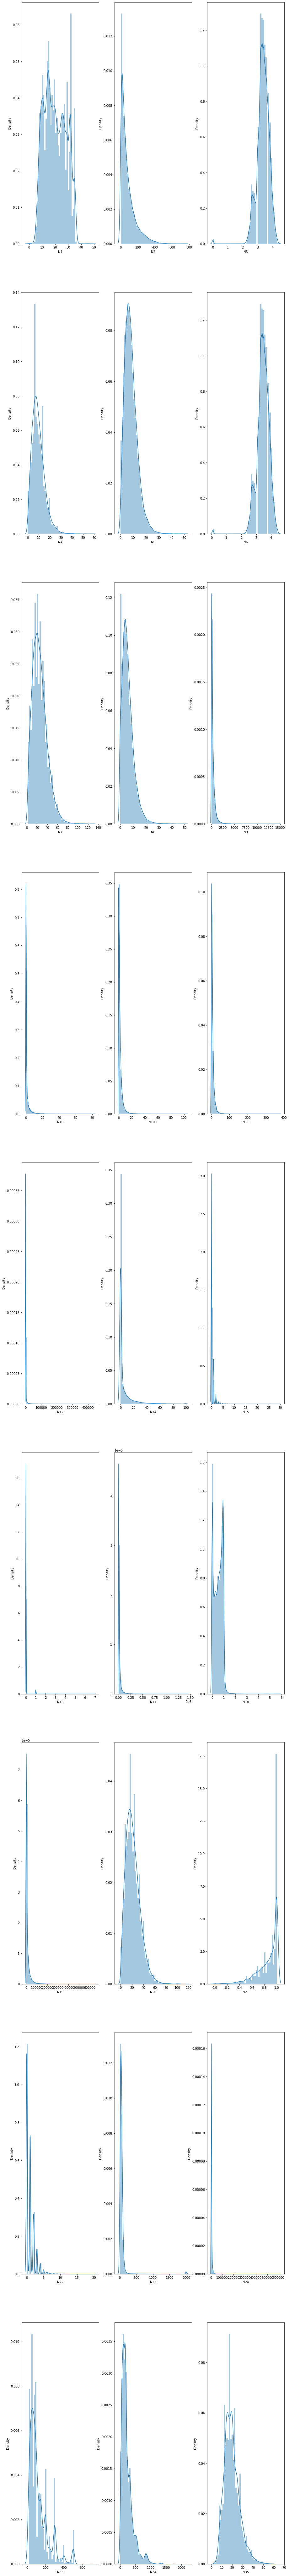

In [ ]:
# Numerical Feature histograms
 
fig,axes = plt.subplots(nrows=9,ncols=3,figsize=(15,150))

for i in range(9,36):
    sns.distplot(x_train_df.iloc[:,i],ax=axes[(i-9)//3,(i-9)%3])

From the histograms of numerical features, it can be seen that a few features have gaussian distribution and some have dirac delta distribution.
Some features have similar distributions like 'N3' and 'N6' hence we check for duplicacy by plotting first

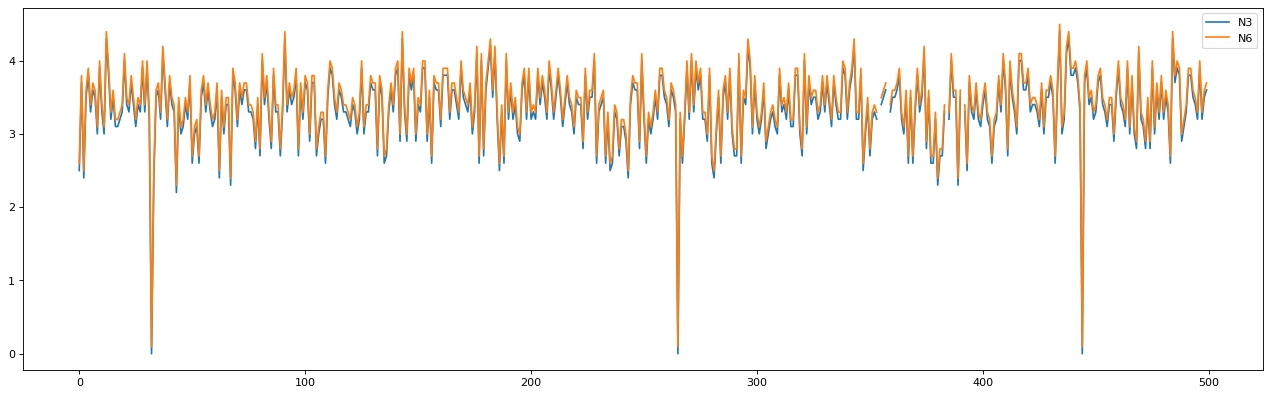

In [ ]:
# plotting N3 and N6 to check duplicacy:-

n6 = x_train_df['N6'].to_numpy()
n3 = x_train_df['N3'].to_numpy()

from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(n3[0:500])
plt.plot(n6[0:500])
plt.legend(["N3", "N6"])

### Handling Missing Values 

Imputing Data with mean/median values in the place of NA.

In [ ]:
# Imputing NAN values with mean for numerical features
# Categorical features C1:C8 do not have missing values as seen during EDA

x_train_df = x_train_df.fillna(x_train_df.mean())
x_train_df.head()
x_test_df = x_test_df.fillna(x_test_df.mean())

In [ ]:
# dont normalize categorical features
# data should be standardised instead of min-max normalization because the use of Pearson's correlation coefficient requires for the two data samples to have a Gaussian or Gaussian-like distribution.

from sklearn import preprocessing

x_train = x_train_df.drop(labels = 'Unique_ID', axis = 1)
x_test = x_test_df.drop(labels = 'Unique_ID', axis = 1)

temp = x_train.iloc[:, :8]
temp2 = x_test.iloc[:, :8]

from sklearn.preprocessing import StandardScaler

# data = temp_2.values
data = x_train.values[:, 8:]
data2 = x_test.values[:, 8:]

scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(data)
data = scaler.transform(data)
data_tst = scaler.transform(data2)

# converting the array back to a dataframe

x_train = pd.DataFrame(data)
x_train.columns = list(x_train_df.columns)[9:]
x_train = pd.concat([temp, x_train], axis=1)

x_test = pd.DataFrame(data2)
x_test.columns = list(x_test_df.columns)[9:]
x_test = pd.concat([temp2, x_test], axis=1)

# naming the columns
x_train.columns = list(x_train_df.columns)[1:]
x_test.columns = list(x_test_df.columns)[1:]

print(x_train.describe())
x_train

                 C1            C2  ...           N34           N35
count  33050.000000  33050.000000  ...  3.305000e+04  3.305000e+04
mean       1.119818      2.403873  ... -2.484855e-16  1.353498e-16
std        0.399382      3.399024  ...  1.000015e+00  1.000015e+00
min        1.000000      0.000000  ... -1.202682e+00 -2.407596e+00
25%        1.000000      0.000000  ... -6.732768e-01 -6.279692e-01
50%        1.000000      1.000000  ... -2.772680e-01 -8.039181e-02
75%        1.000000      3.000000  ...  4.108817e-01  6.040799e-01
max        3.000000     20.000000  ...  1.034291e+01  6.079854e+00

[8 rows x 35 columns]


,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
0,1,0,11,31,0,0,0,1,0.465243,0.000000,-2.102372,3.428657e-16,3.830378e-16,-2.102372,-1.073882,-1.341047,-0.720096,0.418862,3.793764,1.081308e-16,1.818488e-17,0.000000,-0.415822,2.132652e-17,0.000000,-1.264983e-14,0.000000,-3.076953e-16,-6.014116e-14,-9.741085e-17,-0.211327,-0.529096,-0.647851,-0.594729,-1.038652
1,1,4,2,66,2,0,1,1,-1.100580,-0.749143,0.833353,1.240308e+00,7.870262e-01,0.833353,-0.439280,-0.459174,-0.560854,-0.345054,0.937958,2.302580e-01,-1.625182e-01,-0.431664,-0.415822,-1.426307e-01,-0.439289,-1.443974e+00,0.723914,-4.126153e-01,1.419721e-01,8.210500e-02,-0.127231,0.927119,0.329251,0.202596,-0.354181
2,1,0,19,2,0,0,0,1,1.112533,0.000000,-2.347015,3.428657e-16,3.830378e-16,-2.347015,-0.580303,-0.900111,-0.686920,2.328653,0.303335,1.447703e+00,1.818488e-17,0.519607,0.843729,2.132652e-17,0.000000,-1.264983e-14,0.000000,-3.076953e-16,-6.014116e-14,-9.741085e-17,-0.265275,0.192332,-0.973552,-0.933047,-0.217286
3,1,1,16,47,1,0,4,1,-0.244926,-1.014247,0.344066,-1.075887e+00,-9.380225e-01,0.344066,-1.355928,-0.238706,-0.299874,-0.345054,-0.648601,-8.654423e-01,-1.625182e-01,-0.431664,-0.415822,-1.426307e-01,-0.239853,1.111967e+00,-0.490048,-1.365309e+00,8.891493e-01,-7.952940e-01,-0.223862,-0.422699,-0.532898,-0.524331,1.014763
4,1,1,13,1,1,1,6,1,0.927593,1.573674,1.077997,2.752266e-01,5.713951e-01,1.077997,0.406855,0.863635,2.606289,-0.345054,-0.331289,-3.784644e-01,-1.625182e-01,-0.431664,-0.415822,-1.426307e-01,1.320435,1.358322e+00,-0.373195,7.999039e-01,6.400902e-01,-7.952940e-01,-0.099622,0.419448,-0.245515,-0.101032,0.193397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33045,1,1,14,41,2,0,6,1,-0.551926,-0.787015,-0.634509,-4.968383e-01,-5.067604e-01,-0.634509,-1.285416,-0.018238,-0.049953,-0.345054,-0.648601,1.085135e-01,-1.625182e-01,-0.431664,-0.415822,-1.426307e-01,0.029797,4.652829e-01,-0.164941,-1.278700e+00,8.891493e-01,-7.952940e-01,-0.279079,0.312569,0.712236,0.668896,-1.586230
33046,1,6,10,1,2,1,2,1,1.507071,-0.496663,-0.634509,4.682428e-01,5.713951e-01,-0.634509,1.746570,0.202230,-0.222465,0.418862,-0.331289,1.085135e-01,1.789877e-01,2.707532,0.843729,-1.426307e-01,-0.293447,1.019583e+00,-0.496790,1.665989e+00,-1.414647e+00,9.595040e-01,-0.113426,-0.101049,-0.820281,-0.734453,-0.080392
33047,1,1,2,4,2,0,6,1,-1.354564,0.702618,0.833353,8.542753e-01,1.218288e+00,0.833353,0.336344,1.525040,-0.063223,-0.345054,-0.331289,-7.436978e-01,-1.575595e-01,-0.241410,-0.415822,-1.426307e-01,-0.253624,-7.972902e-01,0.442968,5.400784e-01,-6.674698e-01,-7.952940e-01,-0.279079,0.308054,-0.820281,-0.861737,0.056503
33048,1,0,0,0,0,0,0,1,-0.613572,0.000000,-1.613084,3.428657e-16,3.830378e-16,-1.613084,0.265833,-0.238706,-0.355166,1.182779,1.255270,1.447703e+00,1.818488e-17,3.373422,-0.415822,2.132652e-17,0.000000,-1.264983e-14,0.000000,-3.076953e-16,-6.014116e-14,-9.741085e-17,-0.127231,-0.402779,-0.973552,-0.979639,-0.354181


In [ ]:
# Correlation matrix
# data should be standardised instead of min-max normalization because the use of Pearson's correlation coefficient requires for the two data samples to have a Gaussian or Gaussian-like distribution.
# calculate Pearson's correlation matrix for numerical features

correlation_mtx = x_train.iloc[:, 8:].corr(method='pearson')
correlation_mtx

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
N1,1.000000,0.035565,-0.441671,-0.066116,-0.063339,-0.441671,0.037336,-0.104124,-0.016531,0.179080,0.154414,0.138977,0.074221,0.175650,0.129596,0.056701,-0.042510,0.271110,-0.320231,-0.002959,-0.219965,0.081641,0.039333,-0.077371,-0.197556,-0.112508,-0.050637
N2,0.035565,1.000000,0.064445,0.146670,0.142239,0.064445,0.206026,0.128249,0.158966,-0.000678,-0.012314,-0.000347,0.015924,0.025196,0.043402,0.000058,0.120127,0.075152,0.039133,0.262757,0.034767,0.020792,-0.019183,0.095465,0.048310,0.044120,0.300143
N3,-0.441671,0.064445,1.000000,0.105605,0.112010,1.000000,0.111907,0.237494,0.134941,-0.380917,-0.257516,-0.266807,-0.066957,-0.255693,-0.200036,-0.086813,0.070595,-0.328194,0.349916,0.114039,0.388260,-0.081735,-0.008451,0.133145,0.338179,0.293071,0.135720
N4,-0.066116,0.146670,0.105605,1.000000,0.955797,0.105605,0.598473,0.785281,0.506272,-0.125845,0.093517,0.162713,-0.080521,-0.154632,-0.133663,-0.077107,0.355021,0.175294,0.293437,0.698185,0.322219,0.294399,0.068334,0.154882,0.155153,0.145508,0.196356
N5,-0.063339,0.142239,0.112010,0.955797,1.000000,0.112010,0.556181,0.819117,0.528305,-0.120622,0.071711,0.142356,-0.078330,-0.161003,-0.127567,-0.081978,0.368311,0.179189,0.310357,0.650551,0.334635,0.257044,0.070134,0.155961,0.162117,0.152636,0.182002
N6,-0.441671,0.064445,1.000000,0.105605,0.112010,1.000000,0.111907,0.237494,0.134941,-0.380917,-0.257516,-0.266807,-0.066957,-0.255693,-0.200036,-0.086813,0.070595,-0.328194,0.349916,0.114039,0.388260,-0.081735,-0.008451,0.133145,0.338179,0.293071,0.135720
N7,0.037336,0.206026,0.111907,0.598473,0.556181,0.111907,1.000000,0.511742,0.372599,0.104772,0.102063,0.203928,0.061918,0.144836,0.033622,0.024952,0.248946,0.148258,0.156634,0.877543,0.038487,0.172284,0.025724,0.181417,0.110243,0.106832,0.383463
N8,-0.104124,0.128249,0.237494,0.785281,0.819117,0.237494,0.511742,1.000000,0.579700,-0.210058,0.016816,0.077775,-0.065825,-0.188713,-0.143440,-0.065888,0.328845,0.118632,0.332843,0.545873,0.298778,0.197299,0.070143,0.125481,0.192075,0.181825,0.217365
N9,-0.016531,0.158966,0.134941,0.506272,0.528305,0.134941,0.372599,0.579700,1.000000,-0.157123,0.000878,0.038696,-0.049404,-0.177699,-0.135901,-0.046102,0.732267,0.288388,0.191165,0.406808,0.255031,0.028589,0.078499,0.218618,0.219529,0.220335,0.250009
N10,0.179080,-0.000678,-0.380917,-0.125845,-0.120622,-0.380917,0.104772,-0.210058,-0.157123,1.000000,0.143459,0.170593,0.274046,0.443277,0.207688,0.107273,-0.067528,-0.006547,-0.074233,0.010748,-0.367800,-0.008694,-0.019906,-0.044500,-0.165983,-0.151424,0.064299


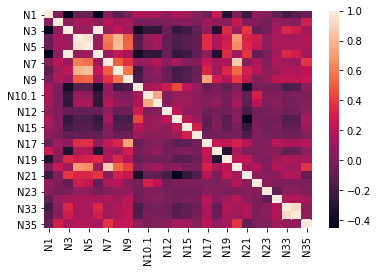

In [ ]:
# Correlation heatmap for visualization

sns.heatmap(correlation_mtx)

### Removing very highly correlated features duplicates

In [ ]:
# Using Correlation for feature selection: when two features have high correlation, we can drop one of the two features.
# threshold = 0.9

# highly_cor_features=[]
highly_cor_features = {}

for i in correlation_mtx.columns:
  for j in correlation_mtx.columns:
    if correlation_mtx[i][j] >= 0.9 and i!=j:
      if i not in list(highly_cor_features.keys()) and j not in list(highly_cor_features.keys()):
        highly_cor_features[i] = [j]

print(highly_cor_features)

{'N3': ['N6'], 'N4': ['N5'], 'N33': ['N34']}


In [ ]:
x_train = x_train.drop(labels = list(highly_cor_features.keys()), axis =1)

num_instances, num_features = x_train.shape
print(x_train.shape)
x_train.head()

x_test = x_test.drop(labels = list(highly_cor_features.keys()), axis =1)

(33050, 32)


In [ ]:
categorical_df = x_train.iloc[:, 0:8]
categorical_df['Dependent_Variable'] = y_train_df['Dependent_Variable']
categorical_df.head()

,C1,C2,C3,C4,C5,C6,C7,C8,Dependent_Variable
0,1,0,11,31,0,0,0,1,1
1,1,4,2,66,2,0,1,1,0
2,1,0,19,2,0,0,0,1,1
3,1,1,16,47,1,0,4,1,0
4,1,1,13,1,1,1,6,1,0


In [ ]:
# Cramer's V for correlation b/w categorical features:-

from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

rows= []

for var1 in categorical_df:
  col = []
  for var2 in categorical_df :
    cramers =cramers_V(categorical_df[var1], categorical_df[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
categorical_corr_mtx = pd.DataFrame(cramers_results, columns = categorical_df.columns, index =categorical_df.columns)

categorical_corr_mtx

,C1,C2,C3,C4,C5,C6,C7,C8,Dependent_Variable
C1,1.00,0.04,0.01,0.01,0.08,0.00,0.01,0.00,0.01
C2,0.04,1.00,0.02,0.01,0.09,0.03,0.06,0.05,0.02
C3,0.01,0.02,1.00,0.01,0.05,0.03,0.05,0.01,0.01
C4,0.01,0.01,0.01,1.00,0.07,0.05,0.09,0.05,0.03
C5,0.08,0.09,0.05,0.07,1.00,0.02,0.30,0.34,0.01
C6,0.00,0.03,0.03,0.05,0.02,1.00,0.11,0.00,0.00
C7,0.01,0.06,0.05,0.09,0.30,0.11,1.00,0.20,0.02
C8,0.00,0.05,0.01,0.05,0.34,0.00,0.20,1.00,0.00
Dependent_Variable,0.01,0.02,0.01,0.03,0.01,0.00,0.02,0.00,1.00


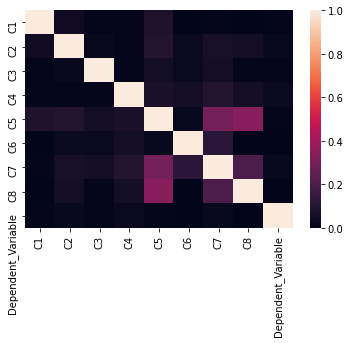

In [ ]:
sns.heatmap(categorical_corr_mtx)

Thus, categorical features don't have a high correlation with each other and thus there is no duplicacy of features.

#Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

y_train = y_train_df.iloc[:, 1]

model = GradientBoostingClassifier()
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
n_scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(x_train, y_train)

Accuracy: 0.743 (0.007)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# ROC AUC 

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [ ]:
# we can split a dataset randomly, although in such a way that maintains the same class distribution in each subset. This is called stratification or stratified sampling and the target variable (y), the class, is used to control the sampling process.
# preserves the imbalanced class distribution in each fold. It is called stratified k-fold cross-validation and will enforce the class distribution in each split of the data to match the distribution in the complete training dataset.

aucs = []
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

y_train = y_train_df.iloc[:, 1]
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
for train_ix, test_ix in kfold.split(x_train, y_train):
  train_X, test_X = x_train.iloc[train_ix, :], x_train.iloc[test_ix,:]
  train_y, test_y = y_train[train_ix], y_train[test_ix]
  y_score = model.predict_proba(test_X)
  auc = sklearn.metrics.roc_auc_score(test_y, y_score[:,1])
  aucs.append(auc)

area_under_curve = np.mean(aucs)
print(area_under_curve)


0.7830054864820561


In [ ]:
y_score.shape

(6610, 2)

In [ ]:
# Predict class probabilities for X_test

probabs = model.predict_proba(x_test)
probabs.shape

#Submission

In [ ]:
y_test = pd.DataFrame(columns=['Unique_ID', 'Probabilities Class 1'])
y_test['Unique_ID'] = x_test_df.iloc[:,0]
y_test['Probabilities Class 1'] = probabs[:, 1]


y_test.to_csv('Submission_ankitajoshi.csv')